## 데이터 전처리
- 제목에 직군 이름 혹은 관련 내용이 들어간 경우만 추출
- 제목에 HTML 태그 제거
- 중복 제거
- 서울, 경기, 충북, 강원 등 앞 부분만 추출

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('crawling_job_all.csv')
df[20:25]

,company,title,url,loc,exp,job_name
20,주식회사 애드타입,<span>데이터</span> 사이언티스트 경력직 채용(9년~),https://jumpit.saramin.co.kr/position/39765,서울 성동구,경력 9~20년,데이터 엔지니어
21,주식회사 애드타입,<span>데이터</span> 사이언티스트 경력직 채용(6~8년),https://jumpit.saramin.co.kr/position/39756,서울 성동구,경력 6~8년,데이터 엔지니어
22,주식회사 애드타입,<span>데이터</span> 사이언티스트 경력직 채용(3~5년),https://jumpit.saramin.co.kr/position/39746,서울 성동구,경력 3~5년,데이터 엔지니어
23,빗썸코리아,<span>데이터</span> 분석 개발자 경력 채용,https://jumpit.saramin.co.kr/position/39305,서울 강남구,경력 4~12년,데이터 엔지니어
24,콜로세움코퍼레이션,<span>데이터</span> 분석가,https://jumpit.saramin.co.kr/position/38662,서울 강남구,경력 1~10년,데이터 엔지니어


#### span 제거

In [3]:
df_ttl = df.copy()

df_ttl['title'] = df_ttl['title'].map(lambda x: re.sub(r'</?span>', '', x))

df_ttl.head()

,company,title,url,loc,exp,job_name
0,(주)데이터누리,데이터 분석가,https://jumpit.saramin.co.kr/position/38408,서울 강서구,경력 5~10년,데이터 분석가
1,콜로세움코퍼레이션,데이터 분석가,https://jumpit.saramin.co.kr/position/38662,서울 강남구,경력 1~10년,데이터 분석가
2,퍼플아카데미,데이터 분석가 신입/경력 채용,https://jumpit.saramin.co.kr/position/38390,서울 양천구,신입~3년,데이터 분석가
3,크레버스,Data Analytics(경력5년) 채용,https://jumpit.saramin.co.kr/position/37543,서울 강남구,경력 5~8년,데이터 분석가
4,테이텀,백엔드 개발자 (경력 3년~5년),https://jumpit.saramin.co.kr/position/38271,서울 강남구,경력 3~5년,데이터 분석가


#### 제목에 직군 이름이 들어간 경우만

In [4]:
df_lower = df_ttl.copy()

df_lower['title'] = df_lower['title'].str.lower()
df_lower.head(10)

,company,title,url,loc,exp,job_name
0,(주)데이터누리,데이터 분석가,https://jumpit.saramin.co.kr/position/38408,서울 강서구,경력 5~10년,데이터 분석가
1,콜로세움코퍼레이션,데이터 분석가,https://jumpit.saramin.co.kr/position/38662,서울 강남구,경력 1~10년,데이터 분석가
2,퍼플아카데미,데이터 분석가 신입/경력 채용,https://jumpit.saramin.co.kr/position/38390,서울 양천구,신입~3년,데이터 분석가
3,크레버스,data analytics(경력5년) 채용,https://jumpit.saramin.co.kr/position/37543,서울 강남구,경력 5~8년,데이터 분석가
4,테이텀,백엔드 개발자 (경력 3년~5년),https://jumpit.saramin.co.kr/position/38271,서울 강남구,경력 3~5년,데이터 분석가
5,크레버스,data engineer(경력5년) 채용,https://jumpit.saramin.co.kr/position/37542,서울 강남구,경력 5~8년,데이터 분석가
6,엔미디어플랫폼,데이터엔지니어 인재모집,https://jumpit.saramin.co.kr/position/38573,서울 송파구,경력 5~12년,데이터 엔지니어
7,워트인텔리전스,데이터 엔지니어 (8년 이상),https://jumpit.saramin.co.kr/position/37991,서울 서초구,경력 8~12년,데이터 엔지니어
8,로이드케이,빅데이터 솔루션 데이터 엔지니어(경력) 채용,https://jumpit.saramin.co.kr/position/38294,경기 성남시,경력 5~13년,데이터 엔지니어
9,알스퀘어,데이터 엔지니어,https://jumpit.saramin.co.kr/position/39493,서울 강남구,경력 5~15년,데이터 엔지니어


In [5]:
def check_keywords(row, keywords):
    for keyword_group in keywords:
        if all(keyword in row for keyword in keyword_group):
            return True
    return False

In [6]:
da_with = [
    ['데이터', '분석'],    
    ['data', 'analyst'],  
    ['db', '분석'],      
    ['데이터', '애널리스트'],
    ['buisness', 'analyst'],
    ['analyst'],   
    ['분석'],     
    ['데이터 분석'], 
    ['data analyst'] 
]

In [7]:
filt = df_lower[df_lower['job_name'] == '데이터 분석가']

da = filt[filt['title'].apply(lambda x: check_keywords(x, da_with))]
da.head()

,company,title,url,loc,exp,job_name
0,(주)데이터누리,데이터 분석가,https://jumpit.saramin.co.kr/position/38408,서울 강서구,경력 5~10년,데이터 분석가
1,콜로세움코퍼레이션,데이터 분석가,https://jumpit.saramin.co.kr/position/38662,서울 강남구,경력 1~10년,데이터 분석가
2,퍼플아카데미,데이터 분석가 신입/경력 채용,https://jumpit.saramin.co.kr/position/38390,서울 양천구,신입~3년,데이터 분석가


In [8]:
de_with = [
    ['데이터', '엔지니어'],    
    ['data', 'engineer'],  
    ['db', '엔지니어'],      
    ['db', 'engineer']
]

In [9]:
filt = df_lower[df_lower['job_name'] == '데이터 엔지니어']

de = filt[filt['title'].apply(lambda x: check_keywords(x, de_with))]
de.head()

,company,title,url,loc,exp,job_name
6,엔미디어플랫폼,데이터엔지니어 인재모집,https://jumpit.saramin.co.kr/position/38573,서울 송파구,경력 5~12년,데이터 엔지니어
7,워트인텔리전스,데이터 엔지니어 (8년 이상),https://jumpit.saramin.co.kr/position/37991,서울 서초구,경력 8~12년,데이터 엔지니어
8,로이드케이,빅데이터 솔루션 데이터 엔지니어(경력) 채용,https://jumpit.saramin.co.kr/position/38294,경기 성남시,경력 5~13년,데이터 엔지니어
9,알스퀘어,데이터 엔지니어,https://jumpit.saramin.co.kr/position/39493,서울 강남구,경력 5~15년,데이터 엔지니어
10,워트인텔리전스,데이터 엔지니어 (3년 이상),https://jumpit.saramin.co.kr/position/37990,서울 서초구,경력 3~5년,데이터 엔지니어


In [10]:
ai_with = [
    ['a', 'i', '개발'],
    ['인공지능', '개발'],
    ['a', 'i', '엔지니어'],
    ['a', 'i', 'engineer'],
    ['a', 'i', '연구'],
    ['a', 'i', 'architect'],
    ['딥', '러닝'],
    ['deep', 'learning'],
    ['machine', 'learning'],
    ['a', 'i', 'researcher'],
    ['a', 'i', 'solution'], 
    ['a', 'i', '전문가']
]

In [11]:
filt = df_lower[df_lower['job_name'] == 'AI 개발자']

ai = filt[filt['title'].apply(lambda x: check_keywords(x, ai_with))]
ai.head()

,company,title,url,loc,exp,job_name
182,엔티엘헬스케어,ai개발자 연구원 신입 채용,https://jumpit.saramin.co.kr/position/39615,경기 성남시,신입,AI 개발자
183,웅진,ai개발자 채용,https://jumpit.saramin.co.kr/position/39422,서울 중구,경력 3~20년,AI 개발자
184,피피에스(주),ai개발자,https://jumpit.saramin.co.kr/position/39366,서울 광진구,경력 1년,AI 개발자
185,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 시니어급 채용,https://jumpit.saramin.co.kr/position/39432,경기 성남시,경력 5~10년,AI 개발자
186,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 주니어급 채용,https://jumpit.saramin.co.kr/position/39431,경기 성남시,신입~5년,AI 개발자


In [12]:
cb_with = [
    ['챗봇', '개발'],
    ['a', 'i', '개발'],
    ['llm', '개발'],
    ['react', '개발'], 
    ['프론트', '개발']
]

In [13]:
filt = df_lower[df_lower['job_name'] == '챗봇 개발자']

cb = filt[filt['title'].apply(lambda x: check_keywords(x, cb_with))]
cb.head()

,company,title,url,loc,exp,job_name
358,피피에스(주),ai개발자,https://jumpit.saramin.co.kr/position/39366,서울 광진구,경력 1년,챗봇 개발자
359,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 시니어급 채용,https://jumpit.saramin.co.kr/position/39432,경기 성남시,경력 5~10년,챗봇 개발자
360,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 주니어급 채용,https://jumpit.saramin.co.kr/position/39431,경기 성남시,신입~5년,챗봇 개발자
361,웅진,ai개발자 채용,https://jumpit.saramin.co.kr/position/39422,서울 중구,경력 3~20년,챗봇 개발자
362,비즈톡,카카오톡 상담톡 및 챗봇 서비스 개발자,https://jumpit.saramin.co.kr/position/37883,서울 강남구,경력 5~10년,챗봇 개발자


In [14]:
cld_with = [
    ['클라우드', '엔지니어'],
    ['cloud', 'engineer'],
    ['cloud', '엔지니어'],
    ['클라우드', 'engineer'],
    ['cloud', 'architect'],
    ['클라우드', '아키텍트'],
    ['클라우드', '운영'],
    ['시스템', '엔지니어'],
    ['클라우드', '개발'],
    ['cloud', '개발'],
    ['서버', '엔지니어'],
    ['네트워크', '엔지니어'],
    ['network', '엔지니어'],
    ['네트워크', 'engineer'],
    ['인프라', '엔지니어'],
    ['cloud', 'sa']
]

In [15]:
filt = df_lower[df_lower['job_name'] == '클라우드 엔지니어']

cld = filt[filt['title'].apply(lambda x: check_keywords(x, cld_with))]
cld.head()

,company,title,url,loc,exp,job_name
377,빗썸코리아,클라우드엔지니어 - aws 서비스 운영,https://jumpit.saramin.co.kr/position/39296,서울 강남구,경력 5~10년,클라우드 엔지니어
378,골든플래닛,클라우드 엔지니어(팀장급 채용),https://jumpit.saramin.co.kr/position/38133,서울 강남구,신입,클라우드 엔지니어
379,빗썸코리아,블록체인 클라우드 엔지니어 (시니어),https://jumpit.saramin.co.kr/position/37616,서울 강남구,경력 8~12년,클라우드 엔지니어
380,빗썸코리아,블록체인 클라우드 엔지니어 (주니어),https://jumpit.saramin.co.kr/position/37615,서울 강남구,경력 1~7년,클라우드 엔지니어
382,바텍,[바텍] 인프라(시스템 엔지니어) 개발자,https://jumpit.saramin.co.kr/position/3403,경기 화성시,신입~20년,클라우드 엔지니어


In [16]:
api_with = [
    ['개발']
]

In [17]:
filt = df_lower[df_lower['job_name'] == 'API 개발자']

api = filt[filt['title'].apply(lambda x: check_keywords(x, api_with))]
api.head()

,company,title,url,loc,exp,job_name
503,델레오코리아,[플랫폼개발팀] java 주니어 개발자,https://jumpit.saramin.co.kr/position/39343,서울 강남구,경력 4~8년,API 개발자
504,(주)와이톤,주니어 백엔드 개발자 채용 (경력),https://jumpit.saramin.co.kr/position/39114,서울 강남구,경력 2~7년,API 개발자
505,(주)와이톤,주니어 백엔드 개발자 채용 (신입),https://jumpit.saramin.co.kr/position/39086,서울 강남구,신입,API 개발자
506,디카르고,java 백엔드 주니어 개발자,https://jumpit.saramin.co.kr/position/38265,서울 강남구,경력 3~5년,API 개발자
507,엠투클라우드,백엔드 개발자 경력 정규직 채용,https://jumpit.saramin.co.kr/position/37836,서울 송파구,경력 6~10년,API 개발자


In [18]:
ml_with = [
    ['머신', '러닝', '엔지니어'],
    ['machine', 'learning', 'engineer'],
    ['ml', 'engineer'],
    ['머신', '러닝', 'engineer'],
    ['ml', '엔지니어'],
    ['machine', 'learning', '엔지니어'],
    ['머신', '러닝', '개발'],
    ['ml', '개발'],
    ['machine', 'learning', '개발'],
    ['a', 'i', '개발']
]

In [19]:
filt = df_lower[df_lower['job_name'] == '머신러닝 엔지니어']

ml = filt[filt['title'].apply(lambda x: check_keywords(x, ml_with))]
ml.head()

,company,title,url,loc,exp,job_name
679,이스트소프트,[estsoft] llm 머신러닝 엔지니어 (경력),https://jumpit.saramin.co.kr/position/38371,서울 서초구,경력 3~7년,머신러닝 엔지니어
680,이스트소프트,[estsoft] 음성 인식(stt) 머신러닝 엔지니어 (경력),https://jumpit.saramin.co.kr/position/38690,서울 서초구,경력 3~7년,머신러닝 엔지니어
681,라이앤캐처스,[추천엔지니어 ml]추천엔지니어(경력) 모집,https://jumpit.saramin.co.kr/position/37561,서울 영등포구,경력 5~10년,머신러닝 엔지니어
682,엠트리센,머신 러닝 엔지니어 정규직 채용,https://jumpit.saramin.co.kr/position/38221,서울 강남구,경력 3~10년,머신러닝 엔지니어
685,덴컴,ml optimization 엔지니어,https://jumpit.saramin.co.kr/position/38172,서울 강남구,신입~6년,머신러닝 엔지니어


In [20]:
ds_with = [
    ['데이터', '사이언티스트'],
    ['data', 'scientist']
]

In [21]:
filt = df_lower[df_lower['job_name'] == '데이터 사이언티스트']

ds = filt[filt['title'].apply(lambda x: check_keywords(x, ds_with))]
ds.head()

,company,title,url,loc,exp,job_name
776,인사이터,(경력 2~5년) 데이터 사이언티스트를 모십니다.,https://jumpit.saramin.co.kr/position/38922,서울 마포구,경력 2~5년,데이터 사이언티스트
777,바로팜,데이터 사이언티스트 (전문연구요원),https://jumpit.saramin.co.kr/position/39777,서울 강남구,경력 1~10년,데이터 사이언티스트
778,주식회사 애드타입,데이터 사이언티스트 경력직 채용(9년~),https://jumpit.saramin.co.kr/position/39765,서울 성동구,경력 9~20년,데이터 사이언티스트
779,주식회사 애드타입,데이터 사이언티스트 경력직 채용(6~8년),https://jumpit.saramin.co.kr/position/39756,서울 성동구,경력 6~8년,데이터 사이언티스트
780,주식회사 애드타입,데이터 사이언티스트 경력직 채용(3~5년),https://jumpit.saramin.co.kr/position/39746,서울 성동구,경력 3~5년,데이터 사이언티스트


In [22]:
len(da), len(de), len(ai), len(cb), len(cld), len(api), len(ml), len(ds)

(3, 17, 67, 8, 33, 154, 30, 10)

In [23]:
final = pd.concat([da, de, ai, cb, cld, api, ml, ds], axis=0, ignore_index=True)
final.head()

,company,title,url,loc,exp,job_name
0,(주)데이터누리,데이터 분석가,https://jumpit.saramin.co.kr/position/38408,서울 강서구,경력 5~10년,데이터 분석가
1,콜로세움코퍼레이션,데이터 분석가,https://jumpit.saramin.co.kr/position/38662,서울 강남구,경력 1~10년,데이터 분석가
2,퍼플아카데미,데이터 분석가 신입/경력 채용,https://jumpit.saramin.co.kr/position/38390,서울 양천구,신입~3년,데이터 분석가
3,엔미디어플랫폼,데이터엔지니어 인재모집,https://jumpit.saramin.co.kr/position/38573,서울 송파구,경력 5~12년,데이터 엔지니어
4,워트인텔리전스,데이터 엔지니어 (8년 이상),https://jumpit.saramin.co.kr/position/37991,서울 서초구,경력 8~12년,데이터 엔지니어


In [24]:
len(final)

322

#### 지역 큰 단위로

In [25]:
df['loc'].unique()

array(['서울 강서구', '서울 강남구', '서울 양천구', '서울 송파구', '서울 서초구', '경기 성남시',
       '서울 성동구', '서울 구로구', '경기 부천시', '서울 마포구', '대구 동구, 경기 안양시', '서울 영등포구',
       '서울 금천구', '경기 용인시', '서울 종로구', '부산 동구', '서울 용산구', '대전 유성구',
       '경남 진주시', '충남 천안시', '인천 연수구', '서울 중구', '인천 계양구', '기타', '울산 남구',
       '서울 관악구', '경기 안양시', '대구 수성구', '서울 광진구', '경기 남양주시', '인천 부평구',
       '충북 청주시', '경기 화성시', '서울 서초구, 울산 울주군', '강원 원주시', '경기 광명시', '광주 동구',
       '경기 과천시', '경기 의왕시', '경남 창원시', '서울 도봉구', '서울 은평구', '부산 해운대구',
       '경기 수원시', '서울', '경기 고양시', '서울 강동구', '제주 제주시'], dtype=object)

In [26]:
df_loc = final.copy()

df_loc['loc'] = df_loc['loc'].map(lambda x: x.split(' ')[0])
df_loc.head()

,company,title,url,loc,exp,job_name
0,(주)데이터누리,데이터 분석가,https://jumpit.saramin.co.kr/position/38408,서울,경력 5~10년,데이터 분석가
1,콜로세움코퍼레이션,데이터 분석가,https://jumpit.saramin.co.kr/position/38662,서울,경력 1~10년,데이터 분석가
2,퍼플아카데미,데이터 분석가 신입/경력 채용,https://jumpit.saramin.co.kr/position/38390,서울,신입~3년,데이터 분석가
3,엔미디어플랫폼,데이터엔지니어 인재모집,https://jumpit.saramin.co.kr/position/38573,서울,경력 5~12년,데이터 엔지니어
4,워트인텔리전스,데이터 엔지니어 (8년 이상),https://jumpit.saramin.co.kr/position/37991,서울,경력 8~12년,데이터 엔지니어


#### 중복 제거

In [27]:
jumpit = df_loc.copy()

jumpit = jumpit.drop_duplicates(['title', 'company'])
len(jumpit)

292

In [28]:
jumpit.to_csv('jumpit_jobs.csv', index=False)

## 시각화

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = 'False'

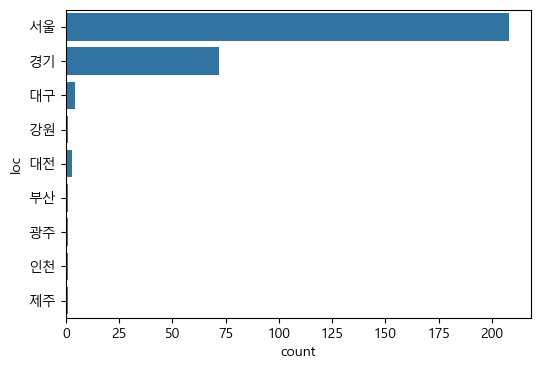

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(jumpit['loc'])

plt.show()

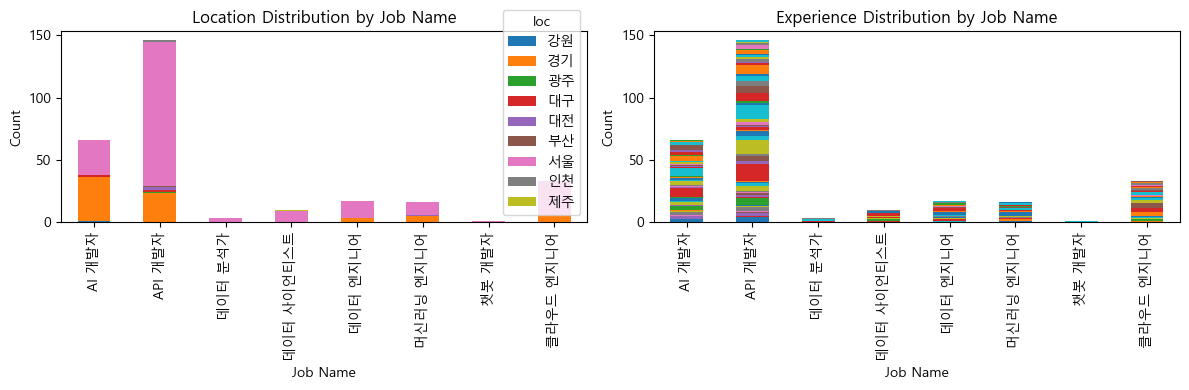

In [32]:
plt.figure(figsize=(12, 4))

# 1. Job Name 별 지역(loc) 분포
plt.subplot(1, 2, 1)
loc_dist = jumpit.groupby('job_name')['loc'].value_counts().unstack().fillna(0)
loc_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Location Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

# 2. Job Name 별 경험(exp) 분포
plt.subplot(1, 2, 2)
exp_dist = jumpit.groupby('job_name')['exp'].value_counts().unstack().fillna(0)
exp_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Experience Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')
plt.gca().get_legend().set_visible(False)

plt.tight_layout()
plt.show()


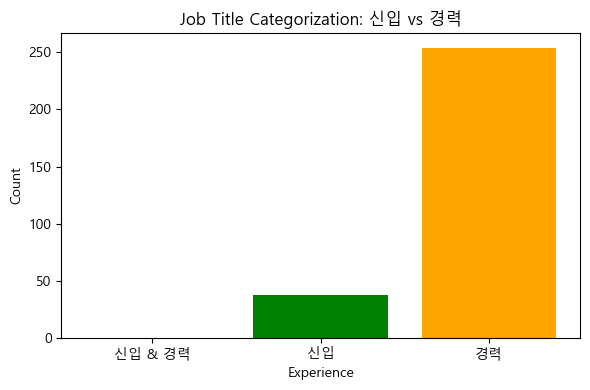

In [33]:
# 신입과 경력 포함 여부를 분리
newbie = jumpit[jumpit['exp'].str.contains('신입', na=False)]
experienced = jumpit[jumpit['exp'].str.contains('경력', na=False)] 

# 신입과 경력이 둘 다 포함된 직무
both = newbie[newbie['exp'].str.contains('경력', na=False)]

# 신입만 포함된 직무 (신입이 포함되고 경력은 포함되지 않음)
only_newbie = newbie[~newbie['exp'].str.contains('경력', na=False)]

# 경력만 포함된 직무 (경력이 포함되고 신입은 포함되지 않음)
only_experienced = experienced[~experienced['exp'].str.contains('신입', na=False)]

# 각 카운트
counts = {
    '신입 & 경력': both.shape[0],
    '신입': only_newbie.shape[0],
    '경력': only_experienced.shape[0]
}

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange'])
plt.title('Job Title Categorization: 신입 vs 경력')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.tight_layout()
plt.show()